In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [11]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [13]:
df['Churn'].value_counts(normalize=True) * 100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

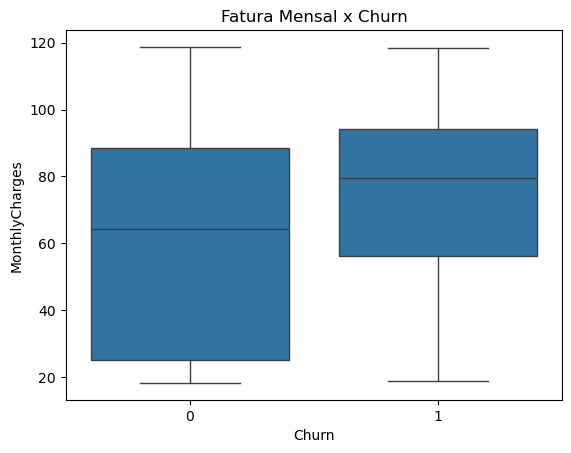

In [26]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Fatura Mensal x Churn')
plt.show()

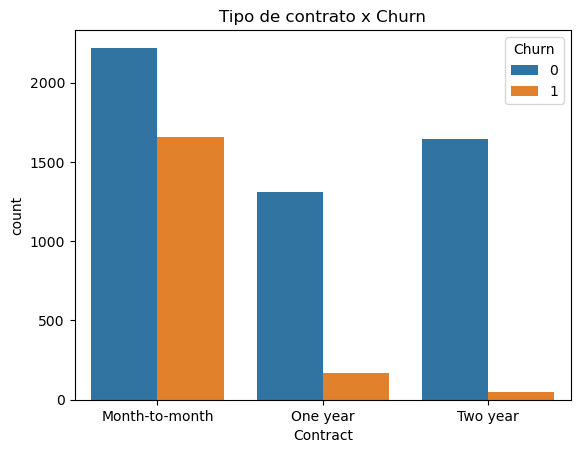

In [30]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Tipo de contrato x Churn')
plt.show()

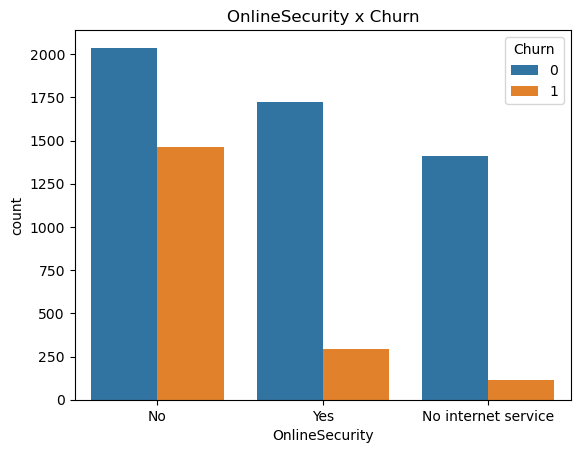

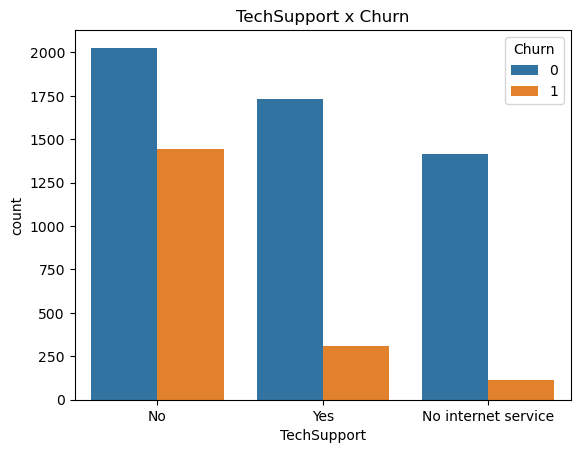

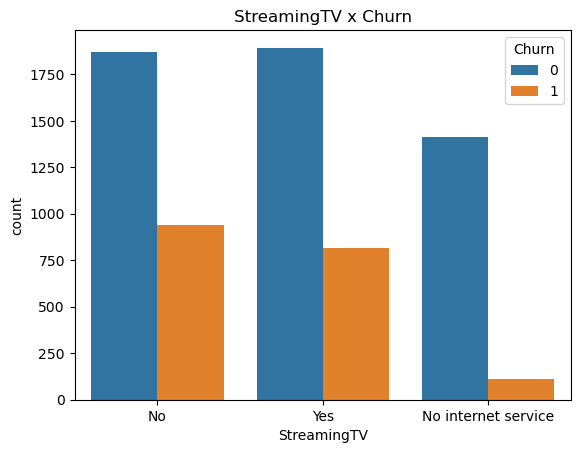

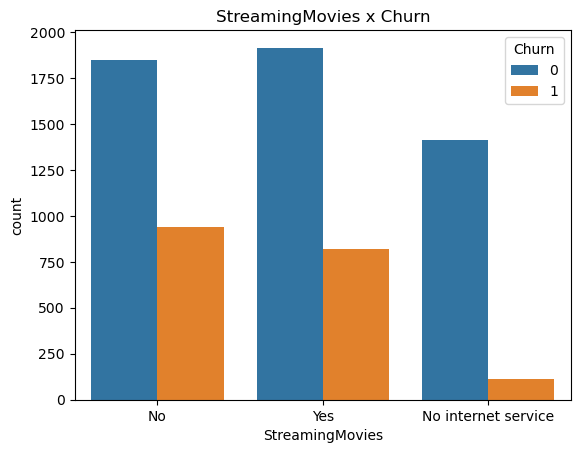

In [32]:
servicos = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for servico in servicos:
    sns.countplot(data=df, x=servico, hue='Churn')
    plt.title(f'{servico} x Churn')
    plt.show()

### Insight 1: Cliente com contratos mensais possuem maior propens√£o a sair?
Vamos analisar a distribui√ß√£o de churn de acordo com o tipo de contrato dos clientes:

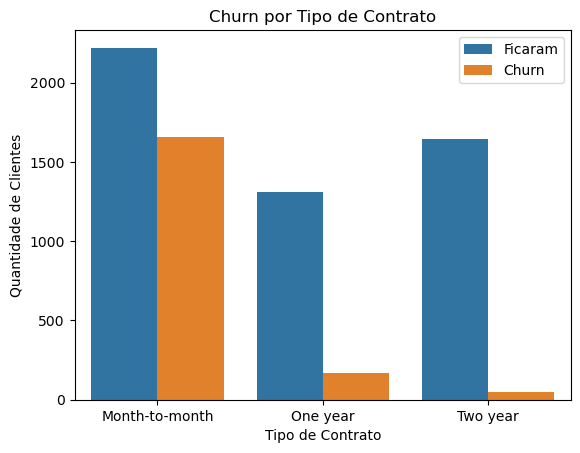

                                            Contract      Churn
0  Month-to-monthMonth-to-monthMonth-to-monthMont...  42.709677
1  One yearOne yearOne yearOne yearOne yearOne ye...  11.269518
2  Two yearTwo yearTwo yearTwo yearTwo yearTwo ye...   2.831858


In [58]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(['Ficaram', 'Churn'])
plt.show()

#Tabela percentual
churn_contract = df.groupby('Contract')['Churn'].mean().reset_index()
print(churn_contract * 100)

### Conclus√£o:
Percebe-se que clientes com **Contratos Mensais** apresentam uma taxa de Churn significativamente maior do que clientes com contratos anuais ou bianuais.

## Insight 2: Servi√ßos extras ajudam a reter clientes?
Aqui vamos analisar se quem possui suporte t√©cnico ou seguran√ßa online tende a permanecer mais tempo na base.

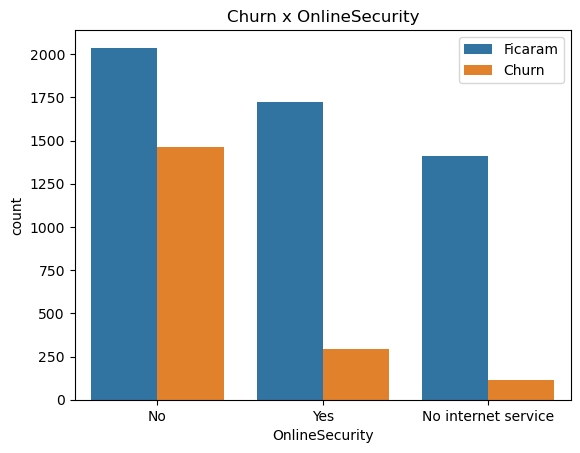

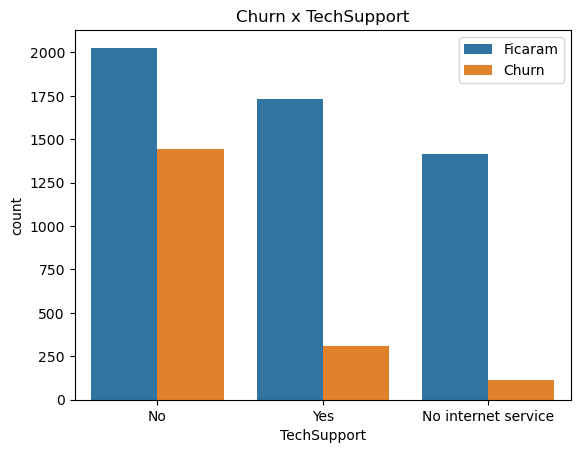

In [71]:
servicos = ['OnlineSecurity', 'TechSupport']

for servico in servicos:
    sns.countplot(data=df, x=servico, hue='Churn')
    plt.title(f'Churn x {servico}')
    plt.legend(['Ficaram', 'Churn'])
    plt.show()

### Conclus√£o:
Clientes que possuem **suporte t√©cnico** ou **seguran√ßa online** parecem ter uma taxa de churn menor, sugerindo que esses servi√ßos contribuem para a reten√ß√£o.

## Insight 3: Fatura mensal alta impacta no churn?

Vamos verificar se h√° rela√ß√£o entre o valor da fatura mensal e a sa√≠da dos clientes.

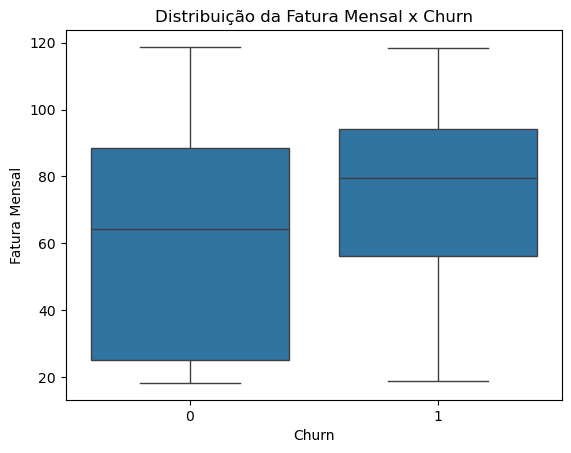

In [75]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribui√ß√£o da Fatura Mensal x Churn')
plt.xlabel('Churn')
plt.ylabel('Fatura Mensal')
plt.show()

### Conclus√£o:
Clientes que cancelaram tendem a ter **faturas m√©dias mais altas** do que aqueles que permaneceram, o que pode indicar um problema de precifica√ß√£o ou percep√ß√£o de valor


## üéØ Sum√°rio Executivo - An√°lise de Churn
### Objetivo do Projeto
O objetivo foi analisar o comportamento de churn (cancelamento) dos clientes de uma empresa de telecom, com foco em identificar os principais fatores que impactam na reten√ß√£o ou perda dos clientes.

### Base de Dados
Dataset utilizado: Telco Customer Churn (fonte: Kaggle).

Tamanho: ~7.000 clientes.

Principais vari√°veis: Contrato, Servi√ßos Extras, Fatura Mensal, Tempo de Cliente e Churn (Sim/N√£o).

### Principais Insights
### üî∑ 1. Contratos mensais possuem maior taxa de churn
Clientes com contratos mensais cancelam em uma taxa duas vezes maior do que clientes com contratos anuais ou bianuais.

Sinaliza uma poss√≠vel falta de fideliza√ß√£o ou barreiras de sa√≠da para clientes mensais.

### üî∑ 2. Servi√ßos extras ajudam a reduzir o churn
Clientes que possuem suporte t√©cnico ou seguran√ßa online apresentam uma taxa de cancelamento menor.

A aus√™ncia desses servi√ßos pode estar relacionada a uma percep√ß√£o de baixo valor do servi√ßo b√°sico.

### üî∑ 3. Faturas mais altas est√£o associadas a maior churn
Clientes que cancelam possuem, em m√©dia, faturas mensais mais altas.

Sinal de que o pre√ßo pode ser um fator relevante para a sa√≠da, especialmente para clientes sem servi√ßos adicionais.

### Recomenda√ß√µes
1. **Incentivar migra√ß√£o de clientes mensais para contratos anuais ou bianuais** com ofertas e benef√≠cios (ex: descontos ou b√¥nus).

2. **Oferecer pacotes de servi√ßos extras** como seguran√ßa online e suporte t√©cnico, inclusive como promo√ß√µes para clientes com maior risco de churn.

3. **Reavaliar a pol√≠tica de pre√ßos**, principalmente para clientes com fatura alta e poucos servi√ßos agregados, ou personalizar planos para diferentes perfis de clientes.

### üéØ Mini Modelo Preditivo - Regress√£o Log√≠stica

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Sele√ß√£o de vari√°veis para o modelo
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Converter TotalCharges para num√©rico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

X = df[features]
y = df['Churn']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divis√£o treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [87]:
# Treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Previs√µes
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1549
           1       0.61      0.42      0.50       561

    accuracy                           0.77      2110
   macro avg       0.71      0.66      0.68      2110
weighted avg       0.76      0.77      0.76      2110



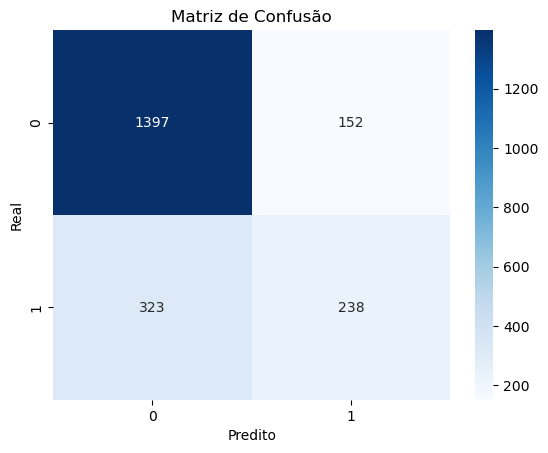

In [89]:
# Relat√≥rio de classifica√ß√£o
print(classification_report(y_test, y_pred))

# Matriz de confus√£o
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confus√£o')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

## üéØ Conclus√£o Final

## Conclus√£o Modelo Preditivo

Criamos um modelo de regress√£o log√≠stica simples capaz de identificar clientes com maior risco de churn, com m√©tricas de avalia√ß√£o satisfat√≥rias para uma primeira vers√£o.

Pr√≥ximos passos poderiam incluir:
- Adi√ß√£o de vari√°veis categ√≥ricas (tipo de contrato, servi√ßos extras);
- Teste com outros algoritmos (√Årvore de Decis√£o, Random Forest);
- Ajuste de hiperpar√¢metros para melhorar a performance do modelo.